In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

In [26]:
# VGG16 - VGG19 model eğit ve aradaki farklara bak.
# 10'ar tane fotoğrafa bakılabilir.

In [3]:
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications.imagenet_utils import decode_predictions
# The decode_predictions utility converts the class predictions of a pretrained ImageNet model
# into the corresponding human-readable ImageNet classes
  # https://stackoverflow.com/questions/50730034/decode-predictions-expects-a-batch-of-predictions-i-e-a-2d-array-of-shape-s

In [4]:
vgg16_model = tf.keras.applications.VGG16(
    weights = 'imagenet',
    input_shape = (224,224,3),
    include_top = True
)

553467096/553467096 [==============================] - 14s 0us/step


In [5]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
len(vgg16_model.layers)

23

### Use pretrained ConvNet to classify one image

In [11]:
# Define a class that load and preprocess one image
def load_process_image(file_path):

  # Load image (in PIL image format by default)
  image_original = load_img(file_path, target_size = (224, 224))
  print("Image size after loading", image_original.size)

  # Convert from numpy array
  image_array = img_to_array(image_original)
  print("Image size after converting to numpy array", image_array.shape)

  # Expand dims to add batch size as 1
  image_batch = np.expand_dims(image_array, axis = 0)
  print("Image size after expanding dimension", image_batch.shape)

  # Preprocess image
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed

In [20]:
cat_image_file_path = "/content/cat.jpg"

In [21]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

Image size after loading (224, 224)
Image size after converting to numpy array (224, 224, 3)
Image size after expanding dimension (1, 224, 224, 3)


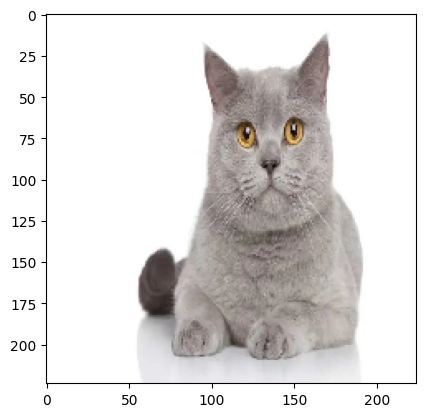

In [22]:
plt.imshow(cat_image_original)

In [23]:
predictions = vgg16_model.predict(cat_image_preprocessed)

1/1 [==============================] - 1s 747ms/step


In [24]:
predicted_class = decode_predictions(predictions, top=1)

In [25]:
predicted_class

[[('n02124075', 'Egyptian_cat', 0.6646154)]]